In [84]:
from ngclearn.utils import io_utils as io
from ngclearn.engine.ngc_graph import NGCGraph

model : NGCGraph

In [85]:
model : NGCGraph
model = io.deserialize('saved_models/mm3108_viktor.ngc')

print(model.nodes.keys())
print(model.theta)
print(model.K)
K = model.K
lat_lat_pos = model.cables["lat-to-lat_pos_mu_dense"]
lat_pos_pos = model.cables["lat_pos-to-pos_mu_dense"]

lat_lat_col = model.cables["lat-to-lat_col_mu_dense"]
lat_col_col = model.cables["lat_col-to-col_mu_dense"]







dict_keys(['lat', 'lat_col', 'lat_pos', 'col', 'pos', 'lat_col_mu', 'lat_pos_mu', 'col_mu', 'pos_mu', 'lc_e', 'lp_e', 'col_e', 'pos_e'])
[<tf.Variable 'A_lat-to-lat_col_mu_dense:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.4438217 , -0.50263655, -0.48759663],
       [ 0.46589383, -0.48049042, -0.55593884],
       [-0.51842135,  0.5446325 ,  0.5010952 ]], dtype=float32)>, <tf.Variable 'A_lat-to-lat_pos_mu_dense:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.38088003,  0.3354461 ,  0.35600927],
       [ 0.33496752,  0.30597854,  0.3247628 ],
       [-0.2908568 , -0.26980177, -0.28134838]], dtype=float32)>, <tf.Variable 'A_lat_col-to-col_mu_dense:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.48710036, -0.42695647, -0.19705385],
       [ 0.24686506,  0.31964475,  0.48350477],
       [ 0.25385776,  0.26380545,  0.52566284]], dtype=float32)>, <tf.Variable 'A_lat_pos-to-pos_mu_dense:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.65708315, -0.2553809 ],
       [-0.2484625 , -0.60851

In [86]:
from utils.construction_utils import SNodeBuilder, CableConnector
from ngclearn.engine.nodes.enode import ENode
_bd = SNodeBuilder()
latent_dim = 3
col_dim = 3
pos_dim = 2

# col = _bd.O0_build("col", dim=col_dim)
# col_e = ENode("col_e", dim=col_dim)
col_F = _bd.O1_set_numerals(zeta=0.0, beta=1.0).O0_build("col_F", dim=col_dim)
# lat_col = _bd.O0_build("lat_col", dim=latent_dim)
# lat_col_e = ENode("lc_e", dim=latent_dim)
lat_col_F = _bd.O1_set_numerals(zeta=0.0, beta=1.0).O0_build("lat_col_F", dim=latent_dim)

latent_vec = _bd.O0_build("lat", dim=latent_dim)

lat_pos_mu = _bd.O0_build("lat_pos_mu", dim=latent_dim)
lat_pos_e = ENode("lp_e", dim=latent_dim)
lat_pos = _bd.O0_build("lat_pos", dim=latent_dim)

pos_mu = _bd.O0_build("pos_mu", dim=pos_dim)
pos_e = ENode("pos_e", dim=pos_dim)
pos = _bd.O0_build("pos", dim=pos_dim)

cc = CableConnector()

lv_lpmu = cc.O1_mirror(lat_lat_pos, mode=cc.Param.A).O0_connect(latent_vec, lat_pos_mu)
cc.O1_simple().O0_connect(lat_pos_mu, lat_pos_e, to_comp=cc.EComps.PMU)
cc.O1_simple().O0_connect(lat_pos, lat_pos_e, to_comp=cc.EComps.PTARG)
lpe_lv = cc.O1_mirror(lat_lat_pos, mode=cc.Param.AT).O0_connect(lat_pos_e, latent_vec)

lp_pmu = cc.O1_mirror(lat_pos_pos, mode=cc.Param.A).O0_connect(lat_pos, pos_mu)
cc.O1_simple().O0_connect(pos_mu, pos_e, to_comp=cc.EComps.PMU)
cc.O1_simple().O0_connect(pos, pos_e, to_comp=cc.EComps.PTARG)
pe_lp = cc.O1_mirror(lat_pos_pos, mode=cc.Param.AT).O0_connect(pos_e, lat_pos)

# ----

lv_lcmu = cc.O1_mirror(lat_lat_col, mode=cc.Param.A).O0_connect(latent_vec, lat_col_F)
# lcmu_lce = cc.O1_simple().O0_connect(lat_col_mu, lat_col_e, to_comp=cc.EComps.PMU)
# lc_lce = cc.O1_simple().O0_connect(lat_col, lat_col_e, to_comp=cc.EComps.PTARG)
# lce_lv = cc.O1_mirror(lv_lcmu).O0_connect(lat_col_e, latent_vec)

lc_cmu = cc.O1_mirror(lat_col_col, mode=cc.Param.A).O0_connect(lat_col_F, col_F)
# cmu_ce = cc.O1_simple().O0_connect(col_mu, col_e, to_comp=cc.EComps.PMU)
# col_ce = cc.O1_simple().O0_connect(col, col_e, to_comp=cc.EComps.PTARG)
# ce_lc = cc.O1_mirror(lc_cmu).O0_connect(col_e, lat_col)

blinded_model = NGCGraph(K=K)
blinded_model.set_cycle([latent_vec, lat_pos, pos])
blinded_model.set_cycle([lat_pos_mu, pos_mu, lat_col_F, col_F])
blinded_model.set_cycle([lat_pos_e, pos_e])
info = blinded_model.compile(batch_size=1)

(100, 100)
[[[0.         0.         0.        ]
  [0.00390698 0.00401622 0.00489274]
  [0.00781396 0.00803244 0.00978548]
  ...
  [0.37897718 0.38957345 0.47459567]
  [0.38288411 0.39358965 0.47948837]
  [0.38679114 0.3976059  0.48438114]]

 [[0.0040615  0.00417516 0.00508672]
  [0.00796848 0.00819138 0.00997945]
  [0.01187546 0.0122076  0.01487219]
  ...
  [0.38303864 0.39374855 0.47968233]
  [0.38694564 0.39776483 0.48457515]
  [0.3908526  0.40178102 0.48946783]]

 [[0.008123   0.00835031 0.01017343]
  [0.01202998 0.01236653 0.01506617]
  [0.01593696 0.01638275 0.01995891]
  ...
  [0.38710013 0.39792368 0.48476902]
  [0.39100716 0.40193999 0.48966184]
  [0.39491415 0.40595621 0.49455461]]

 ...

 [[0.39396536 0.40499005 0.49341133]
  [0.39787236 0.40900627 0.49830407]
  [0.40177932 0.41302249 0.50319678]
  ...
  [0.77294254 0.79456347 0.96800697]
  [0.77684951 0.79857975 0.97289973]
  [0.78075653 0.80259597 0.97779244]]

 [[0.39802685 0.4091652  0.49849802]
  [0.40193385 0.41318142 0

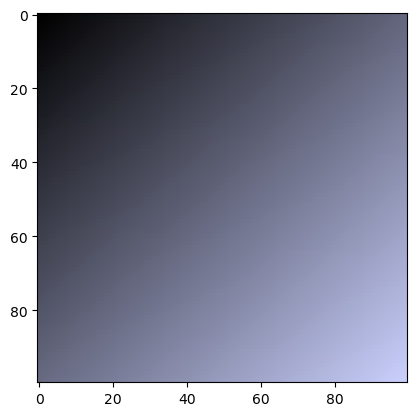

In [87]:
import numpy as np
import tensorflow as tf
dim = 100
pic = np.zeros((dim,dim,3))
print(pic[:,:,0].shape)
for iind, i in enumerate(np.linspace(0,1,dim)):
    for jind, j in enumerate(np.linspace(0,1,dim)):
        pos = np.array([[i, j]])
        pos = tf.cast(pos, dtype=tf.float32)
        rd, d = blinded_model.settle(
            clamped_vars=[("pos", "z", pos)],
            readout_vars=[("col_F", "phi(z)")]
        )
        # print(pic[int(i),int(j)])
        pic[iind,jind,:] = rd[0][2].numpy()[0]
        # print(rd[0,2,:].numpy()[0])
        blinded_model.clear()

import matplotlib.pyplot as plt
print(pic)
plt.imshow(pic)


In [63]:
plt.imsave(fname="Ugly_image.jpg", arr=pic)

ValueError: Floating point image RGB values must be in the 0..1 range.

In [ ]:
from construction_utils import SNodeBuilder, CableConnector
from ngclearn.engine.nodes.enode import ENode
from ngclearn.engine.ngc_graph import NGCGraph
x_dim = 2
z1_dim = 16
z2_dim = 3
bd = SNodeBuilder()
cc = CableConnector()

z2 = bd.O0_build("z2", dim=z2_dim)
mu1 = bd.O0_build("mu1", dim=z1_dim)
e1 = ENode("e1", dim=z1_dim)
z1 = bd.Op1_with_prior().O0_build("z1", dim=z1_dim)
mu0 = bd.O0_build("mu0", dim=x_dim)
# mu0b = bd.O0_build("mu0b", dim=x_dim)
e0 = ENode("e0", dim=x_dim)
# e0b = ENode("e0b", dim=x_dim)
z0 = bd.O0_build("z0", dim=x_dim)
# z0b = bd.O0_build("z0b", dim=x_dim)

z2_mu1 = cc.O1_dense().O0_connect(z2, mu1)
z1_mu0 = cc.O1_dense().O0_connect(z1, mu0)
cc.O1_simple(1.0).O0_connect(mu1, e1, to_comp=cc.EComps.PMU)
cc.O1_simple(1.0).O0_connect(z1, e1, to_comp=cc.EComps.PTARG)
cc.O1_simple(1.0).O0_connect(mu0, e0, to_comp=cc.EComps.PMU)
cc.O1_simple(1.0).O0_connect(z0, e0, to_comp=cc.EComps.PTARG)

cc.O1_mirror(z2_mu1).O0_connect(e1, z2, to_comp=cc.SComps.BU)
cc.O1_mirror(z1_mu0).O0_connect(e0, z1, to_comp=cc.SComps.BU)



circuit = NGCGraph(K=40)
circuit.set_cycle([z2, z1, z0])
circuit.set_cycle([mu1, mu0])
circuit.set_cycle([e1, e0])
circuit.compile(batch_size=1)

from vis import visualize_graph

visualize_graph(circuit, output_dir="vis_net", width='1000px') # generate the graph visual of

In [67]:
from neural_forge.two_way import build_deep_two_way

build_deep_two_way()

two_wayncn.html


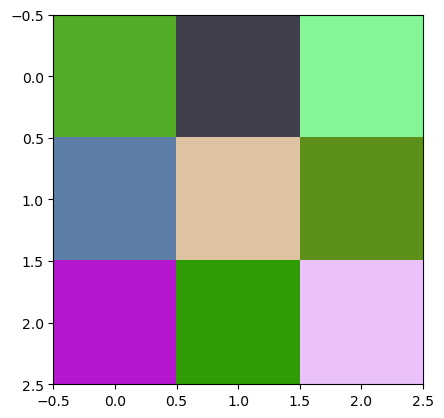

In [83]:
import numpy as np
import matplotlib.pyplot as plt
pic = np.random.random((3,3,3))
plt.imshow(pic)